In [1]:
import pandas as pd #data manipulation
import numpy as np #calculus and algebra
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import stats

In [2]:
passenger_movement_df = pd.read_csv('TRBM1.20240317134742.csv') #Loading the CSV file into a pandas DF

# EDA

In [3]:
passenger_movement_df.head(30) #First 30 rows 

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0
5,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,4,Passenger Movement by Air from All Airports,Number,18098.0
6,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,41,Passenger Movement by Air from Dublin Airport,Number,16762.0
7,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,42,Passenger Movement by Air from Cork Airport,Number,0.0
8,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,43,Passenger Movement by Air from Shannon Airport,Number,1336.0
9,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,431,Passenger Movement by Air from Shannon Airport...,Number,747.0


In [4]:
passenger_movement_df.shape #12936 rows, 10 columns

(12936, 10)

In [5]:
#Renaming columns intuitively
passenger_movement_df = passenger_movement_df.rename(columns={'TLIST(M1)': 'Year' })

In [6]:
passenger_movement_df.dtypes 
#value has no incorrectly inputted values (such as numbers inputted as words), all floats

STATISTIC                      object
STATISTIC Label                object
Year                            int64
Month                          object
DIRECT                          int64
Direction                      object
TYPASS                          int64
Type of Passenger Movement     object
UNIT                           object
VALUE                         float64
dtype: object

In [7]:
passenger_movement_df.count() #VALUE column missing two values

STATISTIC                     12936
STATISTIC Label               12936
Year                          12936
Month                         12936
DIRECT                        12936
Direction                     12936
TYPASS                        12936
Type of Passenger Movement    12936
UNIT                          12936
VALUE                         12934
dtype: int64

In [8]:
passenger_movement_df = passenger_movement_df.drop(["STATISTIC Label", "TYPASS", "UNIT", "DIRECT", "STATISTIC","Month"], axis=1)
#removing columns which aren't needed/contain the same info
#going to keep the two year-month columns as the original form will be used later on in ML section
#copied

In [9]:
ascending_passenger_movement_df = passenger_movement_df.sort_values(by='VALUE', ascending=False) #Year with the most movement
ascending_passenger_movement_df 

,Year,Direction,Type of Passenger Movement,VALUE
12567,200808,Arriving in Eire,Passenger Movement by Air from All Airports,1603381.0
12303,200708,Arriving in Eire,Passenger Movement by Air from All Airports,1575955.0
12281,200707,Arriving in Eire,Passenger Movement by Air from All Airports,1565640.0
12545,200807,Arriving in Eire,Passenger Movement by Air from All Airports,1555437.0
12292,200707,Departing Eire,Passenger Movement by Air from All Airports,1555235.0
...,...,...,...,...
161,196108,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0
2675,197102,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
2631,197012,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
12126,200612,Arriving in Eire,Passenger Movement Cross-Border Bus,NaN


In [10]:
#Checking for duplicates
duplicate_rows_df = passenger_movement_df[passenger_movement_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
#no duplicated data

number of duplicate rows:  (0, 4)


In [11]:
passenger_movement_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        12936 non-null  int64  
 1   Direction                   12936 non-null  object 
 2   Type of Passenger Movement  12936 non-null  object 
 3   VALUE                       12934 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 404.4+ KB


In [12]:
print(passenger_movement_df.isnull().values.any()) #Checking for null values

True


In [13]:
print(passenger_movement_df.isnull().sum()) #two null values

Year                          0
Direction                     0
Type of Passenger Movement    0
VALUE                         2
dtype: int64


In [14]:
passenger_movement_df.dropna(axis=0,inplace=True) #dropping the two rows with null values

In [15]:
passenger_movement_df.shape #two rows have been dropped

(12934, 4)

In [16]:
#function to convert imported year to a decimal for graphing
def year_month_to_decimal(year_month):
    
    year = int(year_month[:4])
    month = int(year_month[4:])
    decimal_month = month / 12.0
    return year + decimal_month

In [17]:
#applying the function to the year 
passenger_movement_df['Year'] = passenger_movement_df['Year'].astype(str)
passenger_movement_df['decimal_year'] = passenger_movement_df['Year'].apply(year_month_to_decimal)
passenger_movement_df['decimal_year'] = passenger_movement_df['decimal_year'].astype(float)
passenger_movement_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
...,...,...,...,...,...
12931,200912,Departing Eire,Passenger Movement by Air from Dublin Airport,664962.0,2010.000000
12932,200912,Departing Eire,Passenger Movement by Air from Cork Airport,76086.0,2010.000000
12933,200912,Departing Eire,Passenger Movement by Air from Shannon Airport,61229.0,2010.000000
12934,200912,Departing Eire,Passenger Movement by Air from Shannon Airport...,50767.0,2010.000000


In [18]:
passenger_movement_df["Direction"].unique() #two unique values

array(['Arriving in Eire', 'Departing Eire'], dtype=object)

In [19]:
passenger_movement_df["Type of Passenger Movement"].unique() #11 unique columns

array(['Passenger Movement by Sea to All Countries',
       'Passenger Movement by Sea to Great Britain',
       'Passenger Movement by Sea to Countries Other Than Great Britain',
       'Passenger Movement Cross-Border Rail',
       'Passenger Movement Cross-Border Bus',
       'Passenger Movement by Air from All Airports',
       'Passenger Movement by Air from Dublin Airport',
       'Passenger Movement by Air from Cork Airport',
       'Passenger Movement by Air from Shannon Airport',
       'Passenger Movement by Air from Shannon Airport (Eastbound)',
       'Passenger Movement by Air from Shannon Airport (Westbound)'],
      dtype=object)

In [21]:
passenger_movement_df.describe() #mean and std indicate the data is heavily skewed

,VALUE,decimal_year
count,1.293400e+04,12934.000000
mean,9.242068e+04,1985.538349
std,1.769196e+05,14.144184
min,0.000000e+00,1961.083333
25%,1.340125e+04,1973.270833
50%,3.542900e+04,1985.500000
75%,8.617450e+04,1997.750000
max,1.603381e+06,2010.000000


In [20]:
passenger_movement_df.describe(include="object") 

,Year,Direction,Type of Passenger Movement
count,12934,12934,12934
unique,588,2,11
top,196101,Arriving in Eire,Passenger Movement by Sea to All Countries
freq,22,6467,1176


In [22]:
def season(x):
    month = int(str(x)[-2:])
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
passenger_movement_df['Season'] =  passenger_movement_df['Year'].apply(season)

In [23]:
#Splitting data into two data frames: arriving into Ireland and departing from Ireland, making sure to not double count

options =['Passenger Movement by Sea to All Countries', 'Passenger Movement Cross-Border Rail', 'Passenger Movement Cross-Border Bus', 'Passenger Movement by Air from All Airports']
#ensure values aren't being double counted

arriving_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Arriving in Eire'])]
arriving_net_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(options)]

departing_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Departing Eire'])]
departing_net_df = departing_df[departing_df['Type of Passenger Movement'].isin(options)]

passenger_movement_net_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'].isin(options)]


# Visualisations

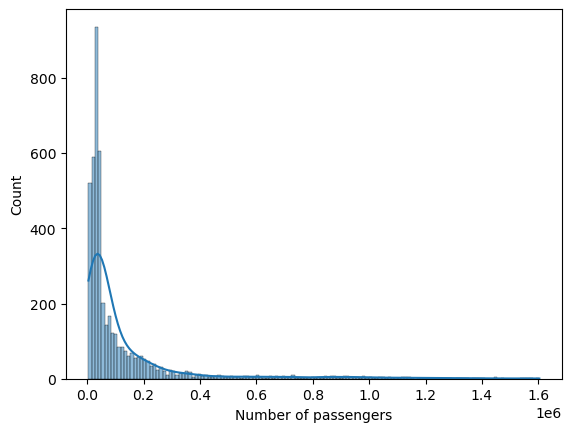

In [24]:
sns.histplot(data=passenger_movement_net_df, x="VALUE", kde = True)
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.savefig('hist')

In [ ]:
sns.boxplot(y = 'VALUE', data = passenger_movement_net_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot')

<Axes: xlabel='VALUE', ylabel='Count'>

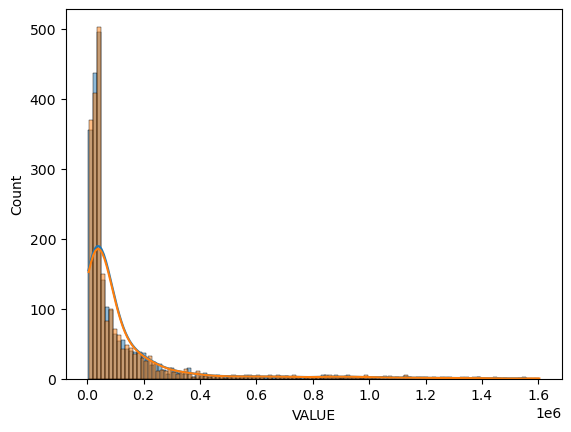

In [25]:
sns.histplot(data=departing_net_df, x="VALUE", kde = True)
sns.histplot(data=arriving_net_df, x="VALUE", kde = True)